In [1]:
from sklearn.impute import KNNImputer
from Data_binary import *
import numpy as np

In [2]:
# read in the training/test sets
env = Data(unknown_rate=1)
env.loadfile_noshuffle("../MDP/csv_files/partitioned_data/survey_training.csv")
training_data = np.array([env.data[i][1] for i in range(len(env.data)) ])

test_env = Data(unknown_rate=1)
test_env.loadfile_noshuffle("../MDP/csv_files/partitioned_data/survey_test.csv")
test_data = np.array([test_env.data[i][1] for i in range(len(test_env.data)) ])

num_features = len(test_data[0])

costs = read_costs("../MDP/csv_files/partitioned_data/survey_cost.csv")

print(training_data.shape)

(4657, 31)


In [3]:
full = np.nan * np.ones((len(training_data) + len(test_data), num_features ))


# populate the training set portion of the matrix
for i in range(len(training_data)):
    full[i] = np.array(training_data[i])
    
for i in range(len(test_data)):
    full[i+len(training_data)] = np.array(test_data[i])

In [4]:
# let's impute using KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")

In [5]:
def load_steps(fname):
    f = open(fname,'r')
    f = open(fname, 'r')
    lines = f.readlines()
    steps_table = []
    for l in lines:
        s = l.split(',')
        steps = []
        for ss in s:
            steps.append(int(ss))
        steps_table.append(steps)
    return steps_table

In [6]:
m = len(training_data)
N = 10
res1 = []

for i in range(N):
    partial = np.nan * np.ones((len(training_data) + len(test_data), num_features ))
    for j in range(len(training_data)):
        partial[j] = np.array(training_data[j])
    
    budget = (i+1)/N
    print("at budget:", budget)
    steps_table = load_steps("../MDP/agent_runs/survey_tree" + str(i+1) + ".csv")
    cur_dist = 0
    # update the steps
    for s in range(len(test_data)):
        for ss in range(len(steps_table[s])):
            cur_update = steps_table[s][ss]
            partial[m+s][cur_update] = test_data[s][cur_update]
        cur = np.vstack((training_data, partial[m+s]))
        cur_full = np.vstack((training_data, full[m+s]))
        #print("r:",cur[-1])
        imputed_partial = imputer.fit_transform(cur)
        #print("i:",imputed_partial[-1])
        cur_dist += np.linalg.norm(imputed_partial-np.array(cur_full))
        
    print(cur_dist)
    res1.append(cur_dist)

at budget: 0.1
689.4795513401924
at budget: 0.2
462.76271006108834
at budget: 0.3
403.2391296698505
at budget: 0.4
375.4509514675713
at budget: 0.5
338.2352879473995
at budget: 0.6
291.24368390027377
at budget: 0.7
245.8890940618083
at budget: 0.8
161.73150848251336
at budget: 0.9
113.03351565547493
at budget: 1.0
0.0


In [7]:
m = len(training_data)
N = 10

res2 = []

for i in range(N):
    partial = np.nan * np.ones((len(training_data) + len(test_data), num_features ))
    for j in range(len(training_data)):
        partial[j] = np.array(training_data[j])
        
    budget = (i+1)/N
    print("at budget:", budget)
    steps_table = load_steps("../MDP/agent_runs/survey_rand" + str(i+1) + ".csv")
    
    cur_dist = 0
    # update the steps
    for s in range(len(test_data)):
        for ss in range(len(steps_table[s])):
            cur_update = steps_table[s][ss]
            partial[m+s][cur_update] = test_data[s][cur_update]
        cur = np.vstack((training_data, partial[m+s]))
        cur_full = np.vstack((training_data, full[m+s]))
        #print("r:",cur[-1])
        imputed_partial = imputer.fit_transform(cur)
        #print("i:",imputed_partial[-1])
        cur_dist += np.linalg.norm(imputed_partial-np.array(cur_full))
    print(cur_dist)
    res2.append(cur_dist)

at budget: 0.1
947.1898833902106
at budget: 0.2
843.6922286475852
at budget: 0.3
745.1958076632206
at budget: 0.4
672.8019723187404
at budget: 0.5
583.8986438956453
at budget: 0.6
483.5807166271517
at budget: 0.7
407.6730916368895
at budget: 0.8
298.56106540396496
at budget: 0.9
172.83412013599735
at budget: 1.0
0.0


In [10]:
m = len(training_data)
N = 10

res3 = []

for i in range(N):
    partial = np.nan * np.ones((len(training_data) + len(test_data), num_features ))
    for j in range(len(training_data)):
        partial[j] = np.array(training_data[j])
    budget = (i+1)/N
    print("at budget:", budget)
    steps_table = load_steps("../MDP/agent_runs/survey" + str(float(i+1)) + ".csv")
  
    cur_dist = 0
    # update the steps
    for s in range(len(test_data)):
        for ss in range(len(steps_table[s])):
            cur_update = steps_table[s][ss]
            if cur_update < num_features:
                partial[m+s][cur_update] = test_data[s][cur_update]
        cur = np.vstack((training_data, partial[m+s]))
        cur_full = np.vstack((training_data, full[m+s]))
        #print("r:",cur[-1])
        imputed_partial = imputer.fit_transform(cur)
        #print("i:",imputed_partial[-1])
        cur_dist += np.linalg.norm(imputed_partial-np.array(cur_full))
    print(cur_dist)
    res3.append(cur_dist)

at budget: 0.1
1069.2414114553012
at budget: 0.2
944.4466791370652
at budget: 0.3
789.3523265568871
at budget: 0.4
875.8692008780286
at budget: 0.5
703.8784181300448
at budget: 0.6
542.8962763945283
at budget: 0.7
460.0197407066805
at budget: 0.8
367.95524648692515
at budget: 0.9
118.80232677108044
at budget: 1.0
0.0


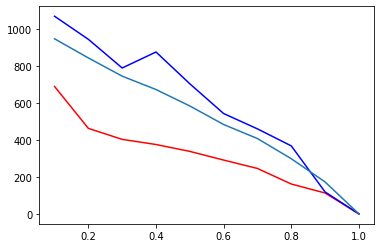

In [11]:
import matplotlib.pyplot as plt

budgets = [(i+1)/N for i in range(N)]
plt.plot(budgets, res1, 'r', budgets, res3, 'b', budgets, res2)
plt.show()